# Crawl articles

 All articles are from http://www.ziyexing.com/luxun

In [ ]:
import requests
from bs4 import BeautifulSoup
import os
import re

output_dir = "./corpus/raw_articles"
os.makedirs(output_dir, exist_ok=True)

# current max index
existing_files = [f for f in os.listdir(output_dir) if f.startswith("page_") and f.endswith(".txt")]
if existing_files:
    max_existing_num = max(int(re.search(r"\d+", f).group()) for f in existing_files)
else:
    max_existing_num = 0

start_index = max_existing_num + 1
print(f"开始编号: {start_index}")


start_page = 1

# 而已集
# end_page = 31  
# url_prefix = "http://www.ziyexing.com/luxun/luxun_zw_eyj_"

# 坟
end_page = 24  # max page number for a book
url_prefix = "http://www.ziyexing.com/luxun/luxun_zw_fen_"

for page_num in range(start_page, end_page + 1):

    url = f"{url_prefix}{page_num:02}.htm"
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        title = soup.title.string

        # extract main article
        content_table = soup.find("p", style="line-height: 150%")
        if content_table:
            content_text = title + "\n"
            
            for element in content_table.stripped_strings:
                content_text += element + "\n"
            
            # save
            file_path = os.path.join(output_dir, f"page_{start_index:03}.txt")
            with open(file_path, 'w', encoding='utf-8') as file:
                file.write(content_text.strip()) 
            
            print(f"Saved: page_{start_index:03}.txt")
            start_index += 1

        else:
            print(f"Cannot find: {url}")
    else:
        print(f"Cannot access: {url}")


# Clean text

In [ ]:
import os
import re

input_dir = "./corpus/raw_articles"
output_dir = "./corpus/cleaned_articles"
os.makedirs(output_dir, exist_ok=True)

# remove annotations inline and special characters
pattern = re.compile(r"[①②③④⑤⑥⑦⑧⑨⑩⑾⑿⒀⒁⒂⒃⒄⒅⒆⒇]|<\d{1,}>|〔\d{1,}〕|（\d{1,}）|【\d{1,}】|［\d{1,}］|〈\d{1,}〉|\(\d{1,}\)")

# clean and format the text
for filename in os.listdir(input_dir):
    if filename.endswith(".txt"):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)
        
        with open(input_path, 'r', encoding='utf-8') as file:
            content = file.read()
        
        # remove annotations at the end of the article
        if "【注释】" in content or "【注】" in content:
            content = re.split("【注释】|【注】", content)[0]
        
        # remove annotations inline and special characters
        content = pattern.sub("", content)
        
        # remove multiple spaces
        content = re.sub(r'\s{2,}', ' ', content)
        
        # combine incomplete paragraphs
        formatted_content = ""
        for line in content.splitlines():
            if line and line.strip()[-1] not in [",", ":", ";", "：", "；", "，"]:
                formatted_content += line.strip() + "\n"
            else:
                formatted_content += line.strip()
        
        # save
        with open(output_path, 'w', encoding='utf-8') as file:
            file.write(formatted_content.strip())
        
        print(f"已清洗并保存: {filename}")


已清洗并保存: page_053.txt
已清洗并保存: page_047.txt
已清洗并保存: page_046.txt
已清洗并保存: page_052.txt
已清洗并保存: page_044.txt
已清洗并保存: page_050.txt
已清洗并保存: page_051.txt
已清洗并保存: page_045.txt
已清洗并保存: page_041.txt
已清洗并保存: page_054.txt
已清洗并保存: page_040.txt
已清洗并保存: page_042.txt
已清洗并保存: page_043.txt
已清洗并保存: page_030.txt
已清洗并保存: page_024.txt
已清洗并保存: page_018.txt
已清洗并保存: page_019.txt
已清洗并保存: page_025.txt
已清洗并保存: page_031.txt
已清洗并保存: page_027.txt
已清洗并保存: page_033.txt
已清洗并保存: page_032.txt
已清洗并保存: page_026.txt
已清洗并保存: page_022.txt
已清洗并保存: page_036.txt
已清洗并保存: page_037.txt
已清洗并保存: page_023.txt
已清洗并保存: page_009.txt
已清洗并保存: page_035.txt
已清洗并保存: page_021.txt
已清洗并保存: page_020.txt
已清洗并保存: page_034.txt
已清洗并保存: page_008.txt
已清洗并保存: page_011.txt
已清洗并保存: page_005.txt
已清洗并保存: page_039.txt
已清洗并保存: page_038.txt
已清洗并保存: page_004.txt
已清洗并保存: page_010.txt
已清洗并保存: page_006.txt
已清洗并保存: page_012.txt
已清洗并保存: page_013.txt
已清洗并保存: page_007.txt
已清洗并保存: page_003.txt
已清洗并保存: page_017.txt
已清洗并保存: page_016.txt
已清洗并保存: page_002.txt
已清洗并保存: page_

In [2]:
# statistics
total_lines = 0
total_chars = 0

for filename in os.listdir(output_dir):
    if filename.endswith(".txt"):
        file_path = os.path.join(output_dir, filename)
        
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
        
        # count lines, characters
        line_count = content.count("\n") + 1
        char_count = len(content)
        average_chars = char_count / line_count
        
        total_chars += char_count
        total_lines += line_count
        
print(f"total: {len(os.listdir(output_dir))} files, {total_lines} lines, {total_chars/total_lines:.2f} chars per line")

total: 54 files, 2550 lines, 94.55 chars per line


# Generate QA pairs for SFT

In [ ]:
import os
import json
from openai import OpenAI

SYSTEM_PROMPT = """
你将被给出一段文字内容，该内容将作为 LLM 的回答。你的任务是为这段文字生成一个合适的问题，使其能引导 LLM 生成该段文字作为回答。请确保问题的设计符合以下要求：

- 对话性：问题应该以第二人称的对话形式，像是在与人交谈，以使 LLM 能够自然地回答。注意，问题不能透露回答的内容。
- 排除无意义内容：
    - 如果段落非常简短（少于 15 字）或缺失上下文的不完整段落，或者是标题性的，则说明它没有生成问题的必要。对于这类段落，返回“None”。
- 总结性段落：如果段落是总结性的，则说明这个问题需要有很多的context，你需要在问题中提供这些context内容。

示例：
对于一段关于“个体反抗”的文字，可以设计问题为：“你认为一个人在面对压迫时，还有什么办法可以保持内心的自由吗？”

请用符合要求的提问生成适合每段文字的问题 prompt。
这段文字是：
"""

openai_key = ""

project_id = ""
client = OpenAI(api_key=openai_key, project=project_id)

def get_data_gpt(content: str) -> str:
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": ''},
            {"role": "user",
             "content": SYSTEM_PROMPT + content,
             "temperature": 1}  # higher temperature for more randomness
        ]
    )
    res = response.choices[0].message.content
    return res

In [5]:
# get_data_gpt("由上文推断，则宋市人小说的必要条件大约有三：1．须讲近世事；2．什九须有“得胜头回”；3．须引证诗词。")
# get_data_gpt("一九二五年七月二十二日")
# get_data_gpt("但现在我所想到的是别一方面──")
get_data_gpt("这世上本没有路，走的人多了，也便成了路。")

'你觉得一个人如何能在没有现成道路的情况下，开辟自己的前进方向呢？'

In [10]:
# 文件夹路径和输出文件路径
txt_folder_path = "corpus/cleaned_articles"
output_file_path = './corpus/qa'
error_file_path = "./qa_error_files.txt"

# 存储所有 QA 数据的列表
all_qadata = []
count = 0

for filename in os.listdir(txt_folder_path):
    print(f"\n\n processing {count + 1} th txt: {filename}\n")
    file_path = os.path.join(txt_folder_path, filename)  # 获取文件完整路径
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            # 读取文件内容，逐行生成每一行的QA对
            qadata = []
            for line in file:
                line = line.strip()
                # # 跳过无意义的段落（例如空行或非常短的内容）
                # if len(line) < 15:
                #     continue
                try:
                    # 获取生成的问题
                    question = get_data_gpt(line)
                    qadata.append({
                        "input": question,
                        "output": line
                    })
                except Exception as e:
                    print(f"生成问题时出错：{e}")
                    with open(error_file_path, "a", encoding='utf-8') as error_file:
                        error_file.write(f"{file_path}: {line}\n")
                    continue
            
            json_file_name = filename.split('.')[0] + '_qa.json'
            with open(os.path.join(output_file_path, json_file_name), 'w', encoding='utf-8') as f:
                json.dump(qadata, f, ensure_ascii=False, indent=4)
            
            all_qadata.extend(qadata)  # 将每个文件生成的 QA 数据追加到总列表中

    except Exception as e:
        # 如果读取文件内容出现异常，记录错误文件路径
        with open(error_file_path, "a", encoding='utf-8') as error_file:
            print(f"错误！无法处理文件 {filename}: {e}")
            error_file.write(file_path + '\n')
        continue
    count += 1




 processing 1 th txt: page_053.txt



 processing 2 th txt: page_047.txt



 processing 3 th txt: page_046.txt



 processing 4 th txt: page_052.txt



 processing 5 th txt: page_044.txt



 processing 6 th txt: page_050.txt



 processing 7 th txt: page_051.txt



 processing 8 th txt: page_045.txt



 processing 9 th txt: page_041.txt



 processing 10 th txt: page_054.txt



 processing 11 th txt: page_040.txt



 processing 12 th txt: page_042.txt



 processing 13 th txt: page_043.txt



 processing 14 th txt: page_030.txt



 processing 15 th txt: page_024.txt



 processing 16 th txt: page_018.txt



 processing 17 th txt: page_019.txt



 processing 18 th txt: page_025.txt



 processing 19 th txt: page_031.txt



 processing 20 th txt: page_027.txt



 processing 21 th txt: page_033.txt



 processing 22 th txt: page_032.txt



 processing 23 th txt: page_026.txt



 processing 24 th txt: page_022.txt



 processing 25 th txt: page_036.txt



 processing 26 th txt: page_037.

## merge all qa pairs into one

In [22]:
import os
import json

def extract_and_merge_conversations(folder_path, output_file):
    all_conversations = []

    # 遍历指定文件夹
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            
            # 打开并读取JSON文件
            with open(file_path, 'r', encoding='utf-8') as file:
                data = json.load(file)
                # 提取需要的字段
                for item in data:
                    try:
                        extracted = {
                            'system': SYSTEM_PROMPT,
                            'input': item['input'],
                            'output': item['output']
                        }
                    except Exception as e:
                        print(f"提取数据时出错：{e}")
                        continue
                    # 将每个对话包装在一个 'conversation' 键中，并作为独立对象加入列表
                    if "None" not in extracted['input']:
                        all_conversations.append({'conversation': [extracted]})

    # 将合并后的所有对话数据写入一个新的JSON文件
    with open(output_file, 'w', encoding='utf-8') as file:
        json.dump(all_conversations, file, ensure_ascii=False, indent=4)
    
    print(f"Merged conversations saved to {output_file}, total: {len(all_conversations)} conversations")

# 使用示例
SYSTEM_PROMPT = """你现在是由SocialAI开发的人情世故大模型。请你以鲁迅的口吻与用户交流。"""
folder_path = './corpus/qa'  # file to be scanned
output_file = './corpus/tianji-luxun-v0.1.json'
extract_and_merge_conversations(folder_path, output_file)

Merged conversations saved to ./corpus/tianji-luxun-v0.1.json, total: 979 conversations


Input: mean=32.57, max=65, min=13
Output: mean=153.90, max=4157, min=8


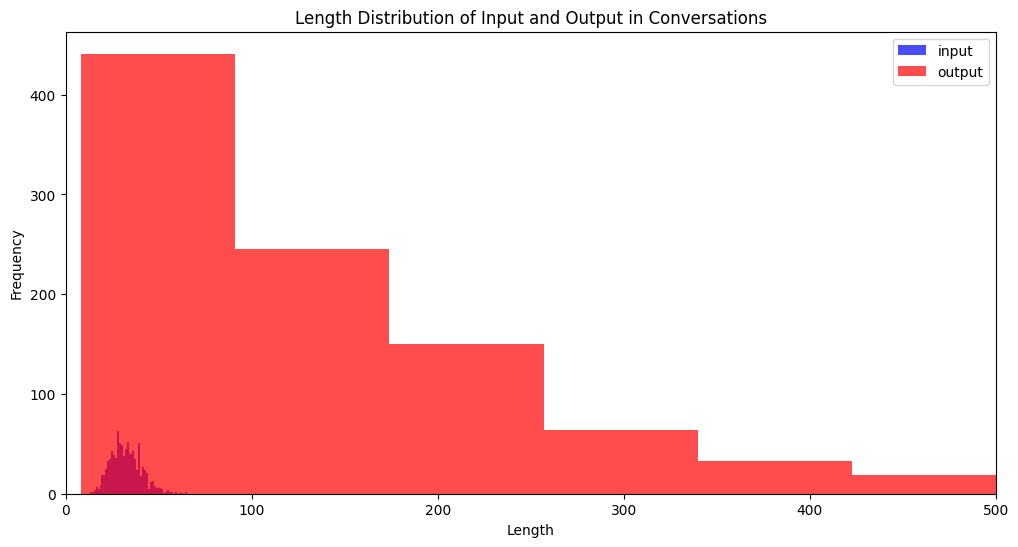

In [25]:
# stastistics
import matplotlib.pyplot as plt

# a function to plot the length distribution of all the input, output in the conversations
def plot_conversation_length_histogram(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    
    input_lengths = []
    output_lengths = []
    
    for conversation in data:
        for qa in conversation['conversation']:
            input_lengths.append(len(qa['input']))
            output_lengths.append(len(qa['output']))
    
    # print statistics
    print(f"Input: mean={sum(input_lengths)/len(input_lengths):.2f}, max={max(input_lengths)}, min={min(input_lengths)}")
    print(f"Output: mean={sum(output_lengths)/len(output_lengths):.2f}, max={max(output_lengths)}, min={min(output_lengths)}")
        
    plt.figure(figsize=(12, 6))
    plt.hist(input_lengths, bins=50, alpha=0.7, color='b', label='input')
    plt.hist(output_lengths, bins=50, alpha=0.7, color='r', label='output')
    plt.title('Length Distribution of Input and Output in Conversations')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.xlim(0, 500)
    plt.legend()
    plt.show()

# plot the length distribution of the input and output in the conversations
plot_conversation_length_histogram('./corpus/tianji-luxun-v0.1.json')